##  CLUSTER TECH WORKERS INTO MENTAL HEALTH PERSONA

KEY POINTS IN THE END OF THE NOTEBOOK

In [1]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import umap
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering

# To ignore all warnings
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully")


2025-08-12 14:53:48.633793: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755010428.973347      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755010429.078066      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


✅ Libraries imported successfully


In [2]:
df = pd.read_csv("/kaggle/input/mental-wellness-data-eda/cleaned_mental_health.csv")

print("✅ Dataframes imported successfully")

✅ Dataframes imported successfully


In [3]:
df_clean = df.drop(columns=['Age', 'Gender', 'Country', 'no_employees', 'wellness_program', 'care_options', 'mental_health_consequence', 'benefits']) 
df_encoded = pd.get_dummies(df_clean, drop_first=False)
df_encoded.shape

(1251, 1490)

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

## REDUCING DIMENSIONS USING PCA 

In [5]:
# Reducing dimensions using PCA
X_pca = PCA(n_components=2, random_state=42).fit_transform(X_scaled)

# Reducing dimensions using t-SNE
X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X_scaled)

# Reducing dimensions using UMAP
X_umap = umap.UMAP(n_components=2, n_neighbors=20, min_dist=0.1, random_state=42).fit_transform(X_scaled)

##  plotting the graphs 

Plotting the graphs


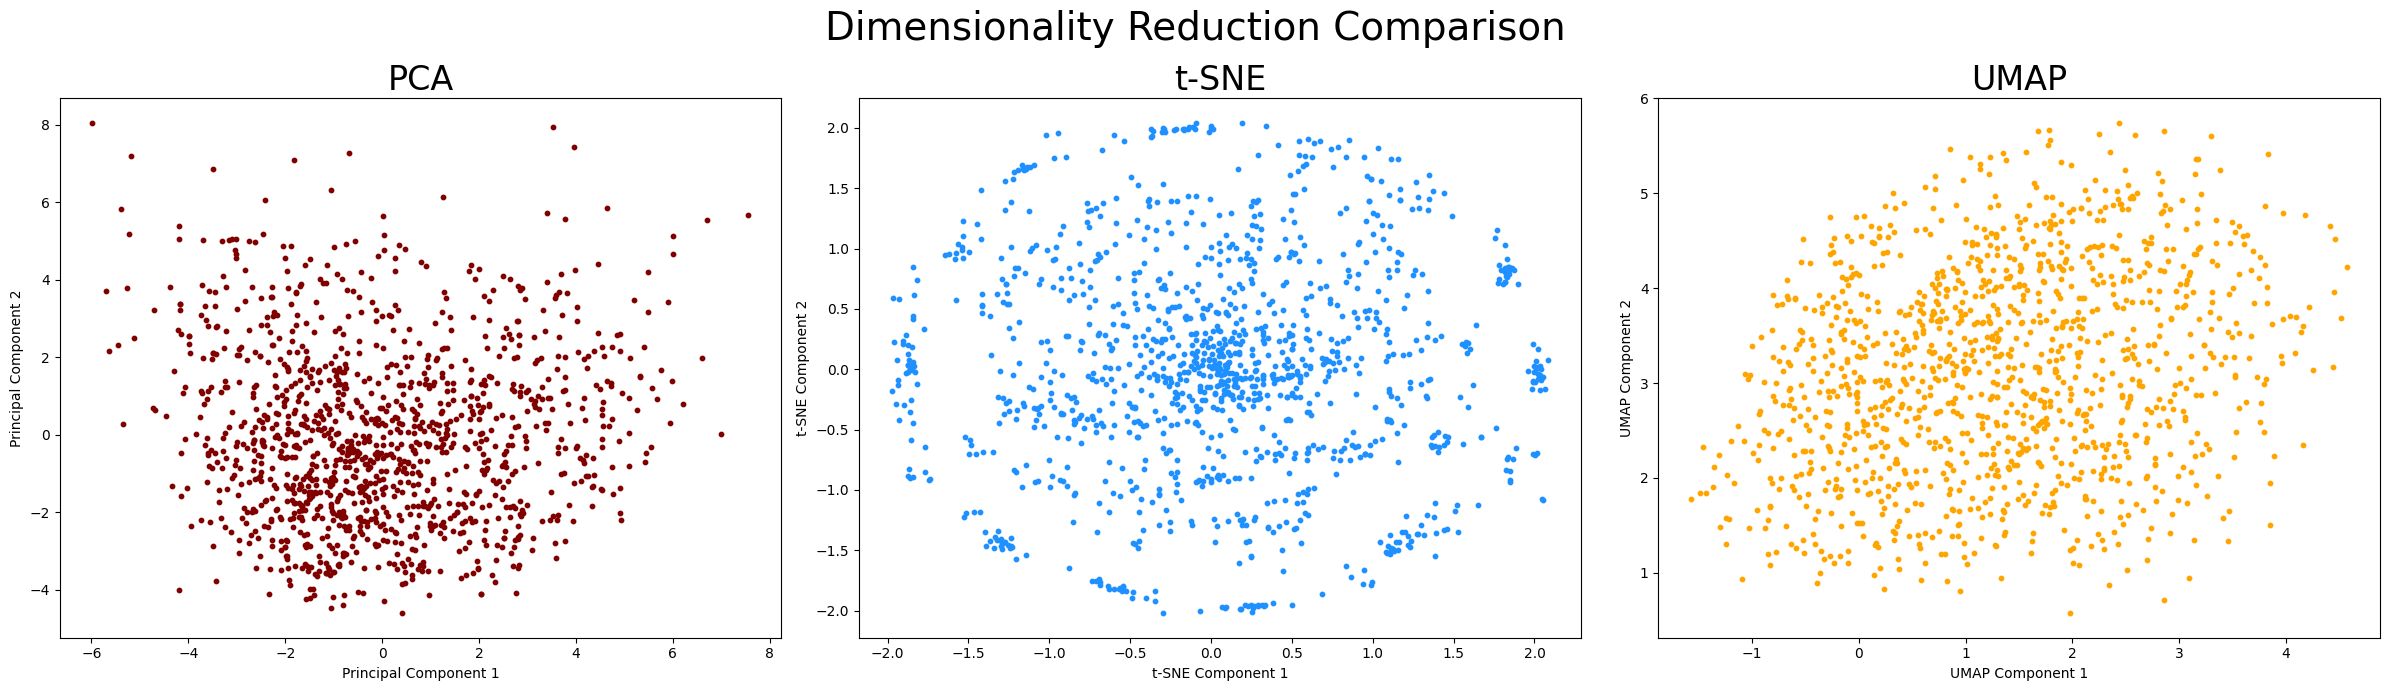

Graphs plotted successfully!!


In [6]:
fig, ax = plt.subplots(1, 3, figsize=(24, 7))

print("Plotting the graphs")

# PLotting PCA 
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], s=10, c='maroon')
ax[0].set_title('PCA', fontsize=24)
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')

# Plotting t-SNE 
ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], s=10, c='dodgerblue')
ax[1].set_title('t-SNE', fontsize=24)
ax[1].set_xlabel('t-SNE Component 1')
ax[1].set_ylabel('t-SNE Component 2')

# PLotting UMAP 
ax[2].scatter(X_umap[:, 0], X_umap[:, 1], s=10, c='orange')
ax[2].set_title('UMAP', fontsize=24)
ax[2].set_xlabel('UMAP Component 1')
ax[2].set_ylabel('UMAP Component 2')

plt.suptitle('Dimensionality Reduction Comparison', fontsize=28)
plt.tight_layout()
plt.show()

print("Graphs plotted successfully!!")

In [7]:
sil_scores = []
k_range = range(2, 11)

print("Printing silhouette scores for UMAP")

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_umap)
    score = silhouette_score(X_umap, labels) 
    sil_scores.append([k, score])

    print(f"k = {k}: {score}")

best_k, best_score = max(sil_scores, key=lambda x: x[1])
print(f"\nHighest Silhouette Score is for k = {best_k}")

Printing silhouette scores for UMAP
k = 2: 0.3695692718029022
k = 3: 0.3657035231590271
k = 4: 0.3696576952934265
k = 5: 0.352642297744751
k = 6: 0.3450486361980438
k = 7: 0.3396933674812317
k = 8: 0.3310849964618683
k = 9: 0.3274630308151245
k = 10: 0.3379147946834564

Highest Silhouette Score is for k = 4


## CLUSTERING METHODS 

In [8]:
print(f"\n Trying out clustering methods with k = {best_k}...\n")

# KMeans
print("➡️ KMeans...")
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_umap)

# Agglomerative
print("➡️ Agglomerative Clustering...")
agg_model = AgglomerativeClustering(n_clusters=best_k)
labels_agg = agg_model.fit_predict(X_umap)

# DBSCAN
print("➡️ DBSCAN...")
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan_model.fit_predict(X_umap)

print("\n✅ Done running all clustering methods!")



 Trying out clustering methods with k = 4...

➡️ KMeans...
➡️ Agglomerative Clustering...
➡️ DBSCAN...

✅ Done running all clustering methods!


## CLUSTERING PERFORMANCE EVALUATION  

In [9]:
print("Clustering Performance Evaluation:")
print("=" * 25)

# K-Means evaluation
kmeans_score = silhouette_score(X_umap, labels_kmeans)
print(f"K-Means Silhouette Score: {kmeans_score:.4f}")
print(f"K-Means Clusters: {len(np.unique(labels_kmeans))}")

# Agglomerative evaluation
agg_score = silhouette_score(X_umap, labels_agg)
print(f"Agglomerative Silhouette Score: {agg_score:.4f}")
print(f"Agglomerative Clusters: {len(np.unique(labels_agg))}")

# DBSCAN evaluation (excluding noise points)
dbscan_mask = labels_dbscan != -1  # Exclude noise points

labels_wo_noise = labels_dbscan[dbscan_mask]
X_wo_noise      = X_umap[dbscan_mask]
unique_clusters = set(labels_wo_noise)

if len(unique_clusters) > 1:
    dbscan_score = silhouette_score(X_wo_noise, labels_wo_noise)
    n_clusters_dbscan = len(unique_clusters)
    n_noise = np.sum(labels_dbscan == -1)
    print(f"DBSCAN Silhouette Score: {dbscan_score:.4f}")
    print(f"DBSCAN Cluster Count: {n_clusters_dbscan}")
    print(f"DBSCAN Noise Points: {n_noise}")
elif len(unique_clusters) == 1:
    print("DBSCAN: Only one cluster (besides noise) found, cannot compute silhouette score.")
else:
    print("DBSCAN: No valid clusters found (all noise points).")


print("\nK-Means shows the best performance and will be used for persona analysis")

Clustering Performance Evaluation:
K-Means Silhouette Score: 0.3697
K-Means Clusters: 4
Agglomerative Silhouette Score: 0.3081
Agglomerative Clusters: 4
DBSCAN: Only one cluster (besides noise) found, cannot compute silhouette score.

K-Means shows the best performance and will be used for persona analysis


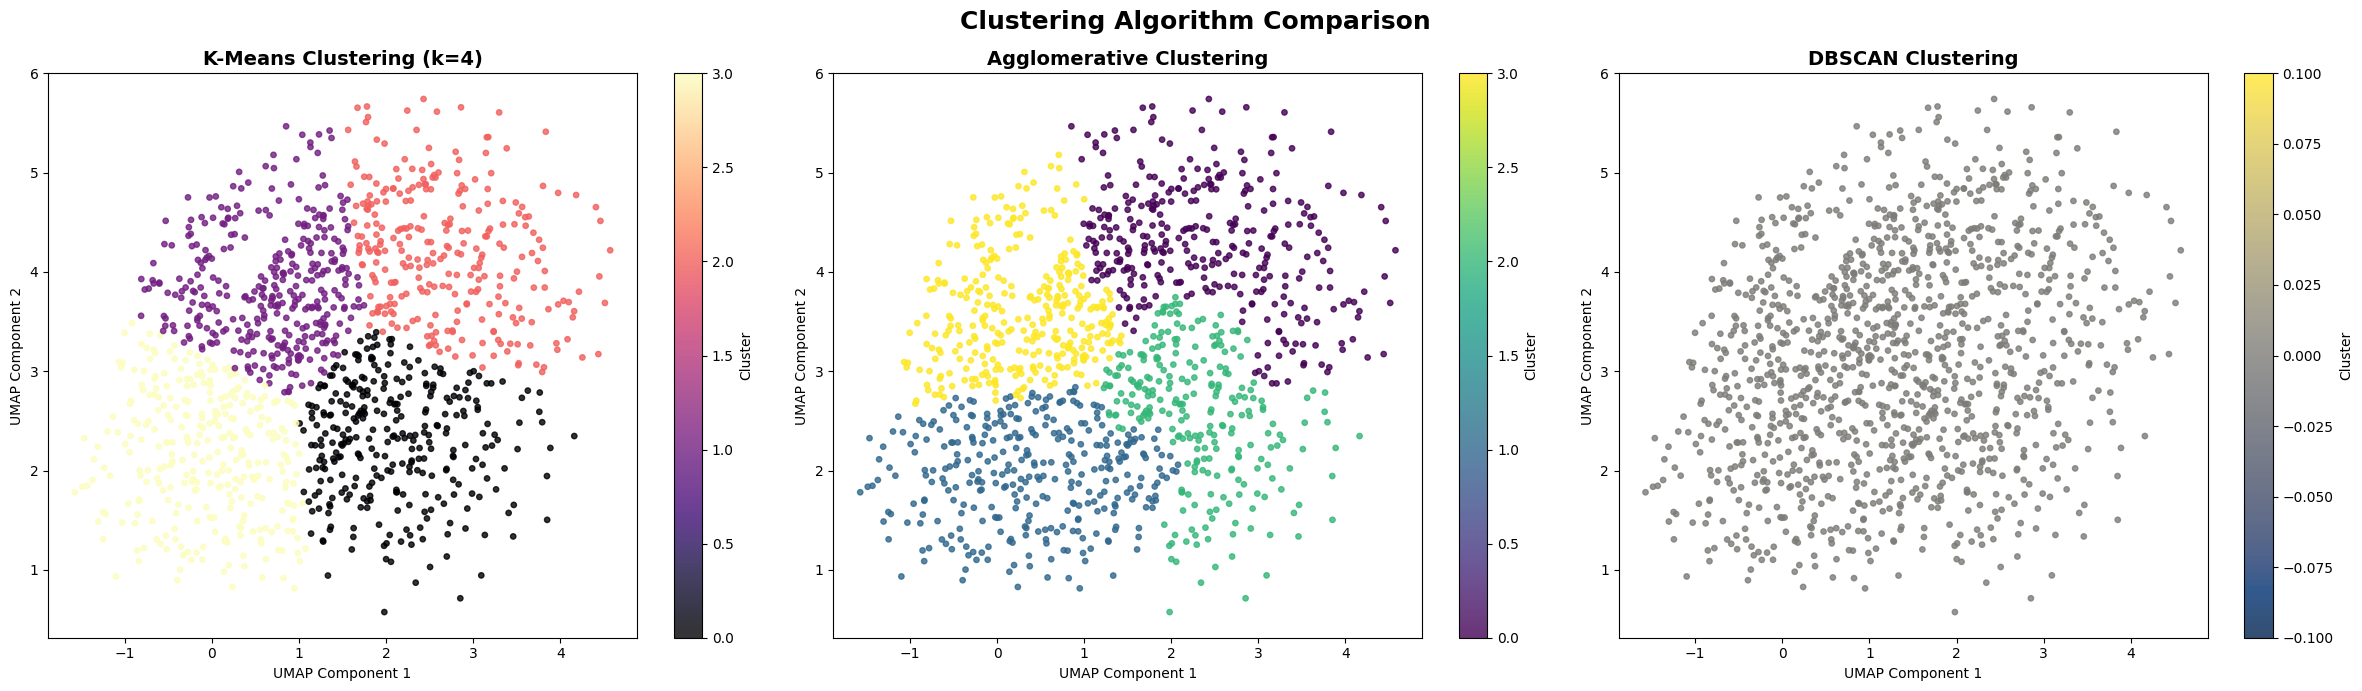

Clustering visualization completed!
Final recommendation: Use K-Means with 4 clusters for persona analysis


In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 7))

# K-Means Visualization
scatter1 = ax1.scatter(X_umap[:, 0], X_umap[:, 1], c=labels_kmeans, cmap='magma', s=15, alpha=0.8)
ax1.set_title(f'K-Means Clustering (k={best_k})', fontsize=14, fontweight='bold')
ax1.set_xlabel('UMAP Component 1')
ax1.set_ylabel('UMAP Component 2')
plt.colorbar(scatter1, ax=ax1, label='Cluster')

# Agglomerative Visualization
scatter2 = ax2.scatter(X_umap[:, 0], X_umap[:, 1], c=labels_agg, cmap='viridis', s=15, alpha=0.8)
ax2.set_title('Agglomerative Clustering', fontsize=14, fontweight='bold')
ax2.set_xlabel('UMAP Component 1')
ax2.set_ylabel('UMAP Component 2')
plt.colorbar(scatter2, ax=ax2, label='Cluster')

# DBSCAN Visualization
scatter3 = ax3.scatter(X_umap[:, 0], X_umap[:, 1], c=labels_dbscan, cmap='cividis', s=15, alpha=0.8)
ax3.set_title('DBSCAN Clustering', fontsize=14, fontweight='bold')
ax3.set_xlabel('UMAP Component 1')
ax3.set_ylabel('UMAP Component 2')
plt.colorbar(scatter3, ax=ax3, label='Cluster')

plt.suptitle('Clustering Algorithm Comparison', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

print("Clustering visualization completed!")
print(f"Final recommendation: Use K-Means with {best_k} clusters for persona analysis")

## Persona A: Grounded Observers
Typically mid-career professionals who feel mentally of sound, grounded, and in control at work. They engage with colleagues socially and comfortably, yet they’re largely unaware of or confused by formal mental-health support systems like leave policies, confidentiality protocols, or how to access help. They’re positive and approachable, but haven’t taken steps toward formal support or interventions.

## Persona B: Struggling Communicators
Actively grappling with mental-health challenges—some may be in therapy or treatment, and often face disruptions at work. They try to speak up about their difficulties and reach out to peers or managers. Still, they’re uncertain about policy details and may only receive help through intervention by others like HR or family. They’re expressive and brave, but often held back by rigid or unsympathetic work structures.

## Persona C: Unaware Enthusiasts
These individuals don't see mental health as a concern—or might not recognize symptoms at all. They haven’t sought support and remain largely uninformed about workplace rules or avenues for help. Their upbeat outlook seems to stem more from inexperience or cultural silence than from actual well-being. They’re friendly and open socially, but passive and disconnected from mental-health conversations. 

## Persona D: Aware Advocates
Conscious that mental health can affect job performance; many of them have sought help or treatment. They thrive in environments with supportive peers and understanding leaders who encourage honest dialogue. Yet they're still navigating confusing areas like confidentiality, leave entitlement, and formal procedures. They’re confident, mentally attuned, and quietly pushing for more open mental-health norms in their workplace.

 

## Persona E: Detached Skeptics
Often younger or early-career professionals, they deny any mental-health impact at work, don’t engage with help-seeking, and are mostly unaware of available support policies. While they may get minimal backing from coworkers, their overall involvement with mental-health systems is limited. They seem indifferent or distant from broader discussions on well-being.

 

## Persona F: Cautious Veterans
Many in this group have pursued treatment in the past but remain hesitant now—often due to burnout, skepticism, or mistrust. They feel unclear about aspects like anonymity or benefit entitlements, and experience inconsistent workplace support: some supervisors care, others fall short. They’re mentally aware yet weary, cautious, and yearning for consistency in a system that feels mixed or unstable. 